In [62]:
import numpy as np
import ochunGRN as oGRN
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [8, 5]
def betterPrint(Dict):
    for k, v in Dict.items():
        if isinstance(v, dict):
            print(f"{k}:")
            for k2, v2 in v.items():
                print(f"\t{k2}: {v2}") 
        else :
            print(f"{k}: {v}")

In [63]:
GENESNB = 5
test = oGRN.randomGrn(GENESNB, 0.2, 0.1)
betterPrint(test)

Graph: DiGraph with 5 nodes and 7 edges
genesNb: 5
autoRG: 0.2
duoRG: 0.1
AdjMatrice: [[ 1.  0.  0.  1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0. -1.  0.  0.  0.]]
meanClustering: 0.0
subGraph:
	0-3-2: Cascade
	0-3-4: Fan-Out
	0-4-1: Cascade
	2-1-3: Cascade
	2-1-4: Fan-In


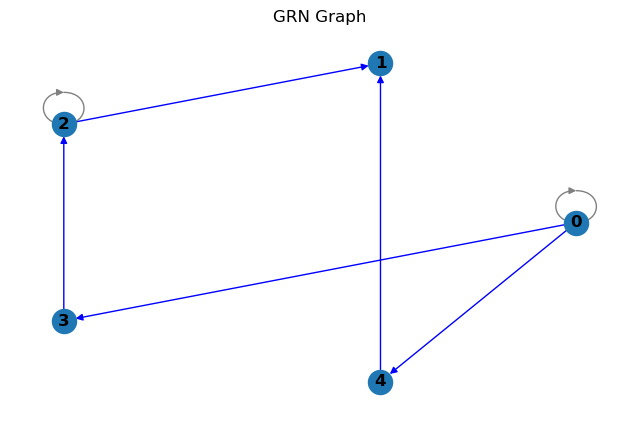

In [64]:
oGRN.plotGraph(test)

In [65]:
oGRN.simulationODEs(test,("massAction","Hill","indirect"),(0,50))
betterPrint(test)

Graph: DiGraph with 5 nodes and 7 edges
genesNb: 5
autoRG: 0.2
duoRG: 0.1
AdjMatrice: [[ 1.  0.  0.  1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0. -1.  0.  0.  0.]]
meanClustering: 0.0
subGraph:
	0-3-2: Cascade
	0-3-4: Fan-Out
	0-4-1: Cascade
	2-1-3: Cascade
	2-1-4: Fan-In
Coefficients:
	ProtsDeg: [0.017472369191661664, 0.008715725147128654, 0.20003020684202194, 0.017616013482475025, 0.012376070380441894]
	mRNAsDeg: [0.07967400351397719, 0.1870652860281872, 0.15997890977071214, 0.09201129228191901, 0.241745908097965]
	TranscriptionsRate: [0.89, 2.08, 1.97, 1.17, 1.82]
	TranslationsRate: [172.44, 32.93, 45.56, 755.0, 370.41]
	mRNAAvg: [14.7, 18.6, 20.0, 17.72, 13.17]
	ProtAvg: [79264.0, 21663.96, 7563.36, 416374.26, 165531.41]
ODEs: ('massAction', 'Hill', 'indirect')
massActionY: [[14.61993756737612, 14.593629144295372, 14.273314581393933, 14.716560271311575, 14.704928458147698, 14.508197237630343, 13.414144027878303, 13.262710804058173, 12.132478102

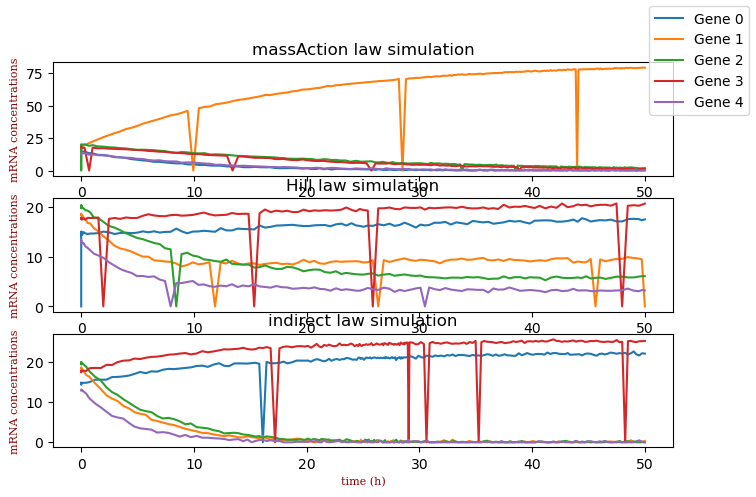

In [66]:
oGRN.plotSim(test)